In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
import itertools

import sklearn
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox 

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg


from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [2]:
df = pd.read_csv('C:/Users/DELL/Desktop/co2.csv', header=0, index_col=0, parse_dates=True)
df

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542
...,...
2010-01-01,15.60000
2011-01-01,15.60000
2012-01-01,14.80000


<AxesSubplot:xlabel='Year'>

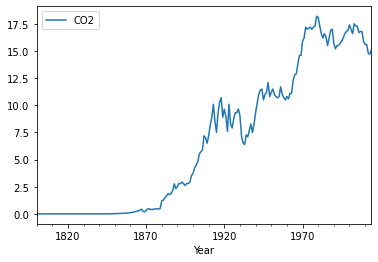

In [3]:
df.plot()

<AxesSubplot:>

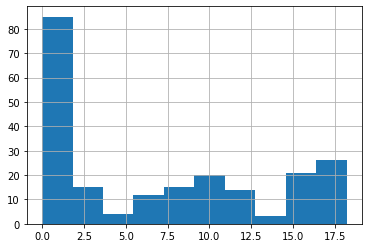

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
df['CO2'].hist() 

In [5]:
#Density plot

<AxesSubplot:xlabel='CO2', ylabel='Density'>

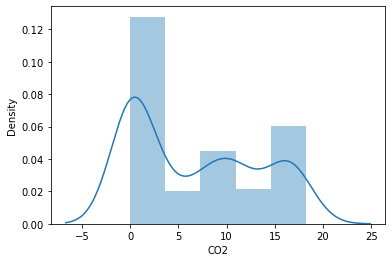

In [6]:
import seaborn as sns
sns.distplot(df['CO2'])

In [7]:
#Box_Cox Transform

In [8]:
from scipy import stats

(array([49.,  9.,  8., 14.,  2.,  8., 13., 16., 44., 52.]),
 array([-3.42876033, -2.68046641, -1.93217249, -1.18387857, -0.43558464,
         0.31270928,  1.0610032 ,  1.80929713,  2.55759105,  3.30588497,
         4.0541789 ]),
 <BarContainer object of 10 artists>)

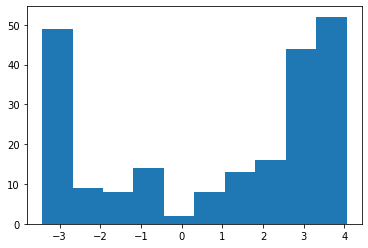

In [9]:
df['co2_boxcox'] ,_ =stats.boxcox(df['CO2'])
plt.hist(df.co2_boxcox)

In [10]:
#Log Transform

In [11]:
import numpy as np

(array([ 28.,  18.,   6.,   5.,   6.,  11.,   6.,  17.,  18., 100.]),
 array([-6.34813949, -5.42318338, -4.49822727, -3.57327117, -2.64831506,
        -1.72335895, -0.79840284,  0.12655327,  1.05150938,  1.97646549,
         2.90142159]),
 <BarContainer object of 10 artists>)

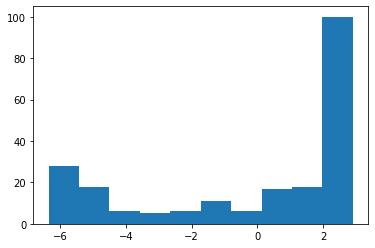

In [12]:
df["logCO2"]=pd.Series(np.log(df.CO2))
plt.hist(df.logCO2)

In [13]:
#square root transform

In [14]:
df['sqr_co2']=np.sqrt(df['CO2'])

(array([65., 15.,  4., 15.,  4.,  7., 20., 33.,  8., 44.]),
 array([0.041833  , 0.46426428, 0.88669556, 1.30912684, 1.73155812,
        2.1539894 , 2.57642068, 2.99885196, 3.42128324, 3.84371452,
        4.2661458 ]),
 <BarContainer object of 10 artists>)

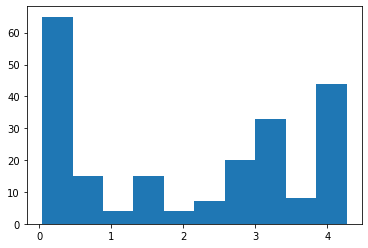

In [15]:
plt.hist(df.sqr_co2)

In [16]:
#Reciprocal transformation

(array([166.,   3.,   0.,  19.,   8.,   5.,   4.,   3.,   4.,   3.]),
 array([5.49450549e-02, 5.71923077e+01, 1.14329670e+02, 1.71467033e+02,
        2.28604396e+02, 2.85741758e+02, 3.42879121e+02, 4.00016484e+02,
        4.57153846e+02, 5.14291209e+02, 5.71428571e+02]),
 <BarContainer object of 10 artists>)

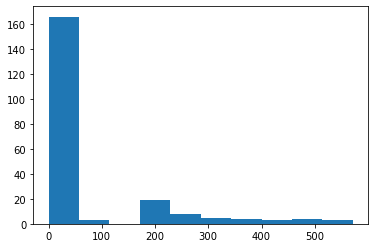

In [17]:
df['Rec_co2']=1/(df['CO2'])
plt.hist(df.Rec_co2)

In [18]:
#exponential transform

(array([181.,   8.,  10.,   8.,   6.,   0.,   0.,   0.,   0.,   2.]),
 array([1.00175153e+00, 8.01972764e+06, 1.60394543e+07, 2.40591809e+07,
        3.20789076e+07, 4.00986342e+07, 4.81183608e+07, 5.61380875e+07,
        6.41578141e+07, 7.21775408e+07, 8.01972674e+07]),
 <BarContainer object of 10 artists>)

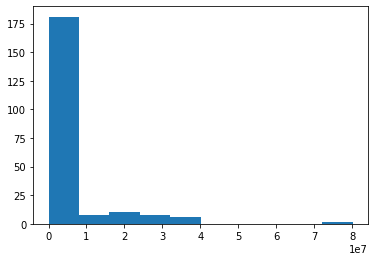

In [19]:
df['Exp_co2']=np.exp(df['CO2'])
plt.hist(df.Exp_co2)

array([[<AxesSubplot:title={'center':'CO2'}>,
        <AxesSubplot:title={'center':'co2_boxcox'}>],
       [<AxesSubplot:title={'center':'logCO2'}>,
        <AxesSubplot:title={'center':'sqr_co2'}>],
       [<AxesSubplot:title={'center':'Rec_co2'}>,
        <AxesSubplot:title={'center':'Exp_co2'}>]], dtype=object)

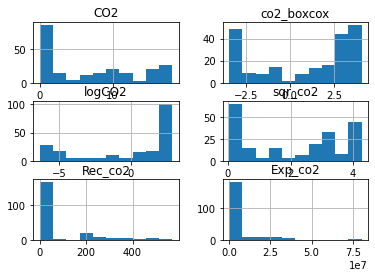

In [20]:
df.hist()

In [21]:
#Since we didnot get any conclusive evidence of being normal distribution. We have decided to move on without transforming it to normal distribution.

In [22]:
df = df.drop(['co2_boxcox', 'logCO2','Rec_co2','sqr_co2','Exp_co2'], axis = 1)

<AxesSubplot:xlabel='Year'>

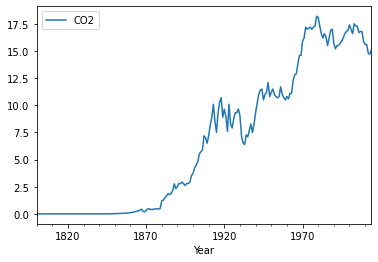

In [23]:
df.plot()

In [24]:
X = df.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.888644, mean2=12.650000
variance1=2.399437, variance2=13.176064


In [25]:
def TestStationaryPlot(df):
    rol_mean = df.rolling(window = 20, center = False).mean()
    rol_std = df.rolling(window = 20, center = False).std()
    
    plt.plot(df, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Total Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 10)
    plt.show(block= True)

In [26]:
# null Hypothesis : Data is stationary
#alternate hypothesis : Data is not stationary

In [27]:
def TestStationaryAdfuller(df, cutoff = 0.01):
    df_test = adfuller(df, autolag = 'AIC')
    df_test_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in df_test[4].items():
        df_test_output['Critical Value (%s)'%key] = value
    print(df_test_output)
    
    if df_test[1] <= cutoff:
        print("Failed to reject null hypothesis. Data is stationary")
    else:
        print("Failed to accept null hypothesis. Data is non-stationary ")

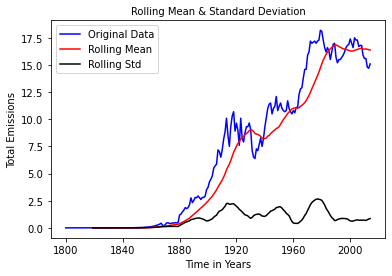

In [28]:
TestStationaryPlot(df)

In [29]:
TestStationaryAdfuller(df)

Test Statistic                  -0.378463
p-value                          0.913633
#Lags Used                       0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64
Failed to accept null hypothesis. Data is non-stationary 


In [30]:
#Transforming data to Stationary by using moving average, differencing and decompostion

In [31]:
#Moving Average

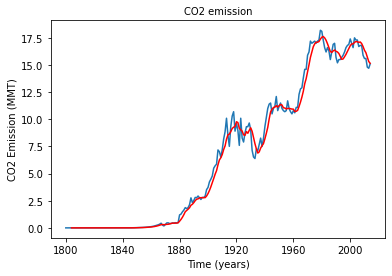

In [32]:
moving_avg = df.rolling(5).mean()
plt.plot(df)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time (years)', fontsize = 10)
plt.ylabel('CO2 Emission (MMT)', fontsize = 10)
plt.title('CO2 emission', fontsize = 10)
plt.show()

In [33]:
moving_avg_diff = df - moving_avg
moving_avg_diff.head(13)

,CO2
Year,
1800-01-01,NaN
1801-01-01,NaN
1802-01-01,NaN
1803-01-01,NaN
1804-01-01,-0.000128
1805-01-01,-0.000124
1806-01-01,-0.000130
1807-01-01,-0.000126
1808-01-01,-0.000124


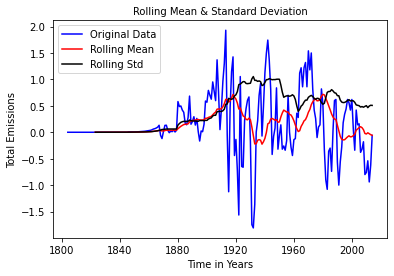

In [34]:
moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(moving_avg_diff)

In [35]:
TestStationaryAdfuller(moving_avg_diff)

Test Statistic                  -3.944115
p-value                          0.001733
#Lags Used                       4.000000
Number of Observations Used    206.000000
Critical Value (1%)             -3.462499
Critical Value (5%)             -2.875675
Critical Value (10%)            -2.574304
dtype: float64
Failed to reject null hypothesis. Data is stationary


In [36]:
#First order differencing

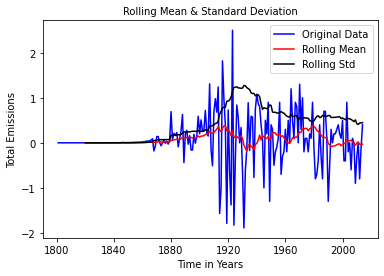

In [37]:
df_first_difference = df - df.shift(1)  
TestStationaryPlot(df_first_difference.dropna(inplace=False))

In [38]:
TestStationaryAdfuller(df_first_difference.dropna(inplace=False))

Test Statistic                  -3.780005
p-value                          0.003119
#Lags Used                      15.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Failed to reject null hypothesis. Data is stationary


In [39]:
#Seasonal First order differencing

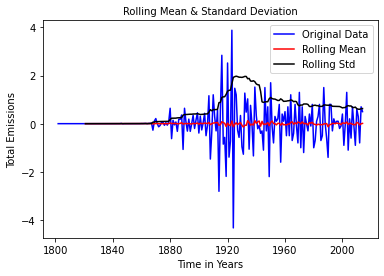

In [40]:
df_seasonal_first_difference = df_first_difference - df_first_difference.shift(1)  
TestStationaryPlot(df_seasonal_first_difference.dropna(inplace=False))

In [41]:
TestStationaryAdfuller(df_seasonal_first_difference.dropna(inplace=False))

Test Statistic                  -5.536081
p-value                          0.000002
#Lags Used                      14.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Failed to reject null hypothesis. Data is stationary


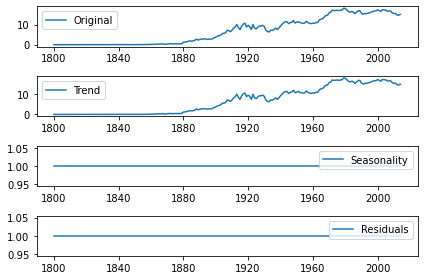

In [42]:
decomposition = seasonal_decompose(df,freq=1,model="multiplicable")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

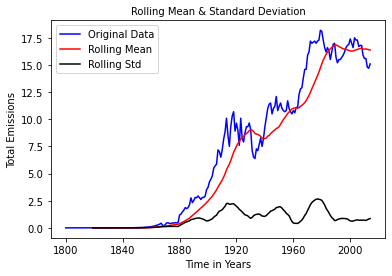

Test Statistic                  -0.378463
p-value                          0.913633
#Lags Used                       0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64
Failed to accept null hypothesis. Data is non-stationary 


In [43]:
df_decompose = trend
df_decompose.dropna(inplace=True)
TestStationaryPlot(df_decompose)
TestStationaryAdfuller(df_decompose)

In [44]:
#ACF & PACF plot for seasonal first order difference

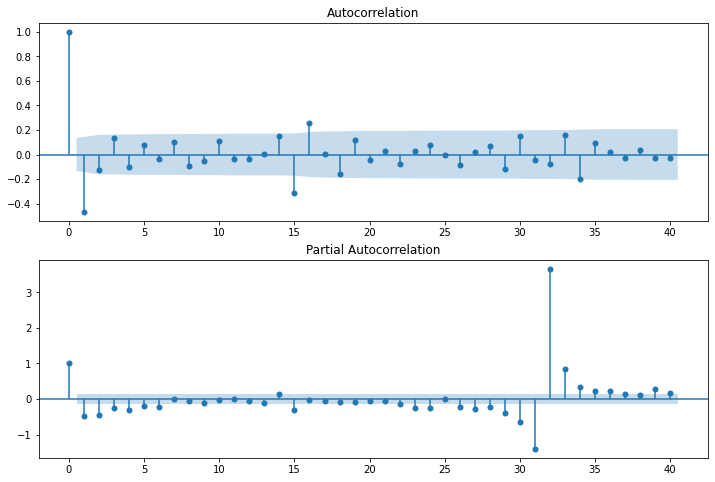

In [45]:
#ACF and PACF plots:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax2)

In [46]:
#using seasonal first order difference
df_seasonal_first_difference.head()

,CO2
Year,
1800-01-01,NaN
1801-01-01,NaN
1802-01-01,0.00001
1803-01-01,-0.00001
1804-01-01,0.00001


In [47]:
X = df_seasonal_first_difference.dropna(inplace=False)

In [48]:
X.head()

,CO2
Year,
1802-01-01,1.000000e-05
1803-01-01,-1.000000e-05
1804-01-01,1.000000e-05
1805-01-01,-8.673617e-19
1806-01-01,-1.000000e-05


In [49]:
# Create Training and Test
train = X.iloc[:-20]
test = X.iloc[-20:]

In [50]:
print(train.shape,test.shape)

(193, 1) (20, 1)


In [51]:
train.head()

,CO2
Year,
1802-01-01,1.000000e-05
1803-01-01,-1.000000e-05
1804-01-01,1.000000e-05
1805-01-01,-8.673617e-19
1806-01-01,-1.000000e-05


In [52]:
test.head()

,CO2
Year,
1995-01-01,1.776357e-15
1996-01-01,1.000000e-01
1997-01-01,1.000000e-01
1998-01-01,-2.000000e-01
1999-01-01,-1.000000e-01


### Hyperparameter Tuning

In [53]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [54]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [55]:
# evaluate parameters
p_values = [0, 1, 2, 3, 4, 5]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, test.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.613
ARIMA(0, 0, 1) RMSE=0.467
ARIMA(0, 0, 2) RMSE=0.471
ARIMA(0, 1, 0) RMSE=1.037
ARIMA(0, 1, 1) RMSE=0.613
ARIMA(0, 1, 2) RMSE=0.450
ARIMA(0, 2, 0) RMSE=1.853
ARIMA(0, 2, 1) RMSE=1.039
ARIMA(0, 2, 2) RMSE=0.679
ARIMA(1, 0, 0) RMSE=0.546
ARIMA(1, 0, 1) RMSE=0.470
ARIMA(1, 0, 2) RMSE=0.464
ARIMA(1, 1, 0) RMSE=0.838
ARIMA(1, 1, 1) RMSE=0.546
ARIMA(1, 1, 2) RMSE=0.451
ARIMA(1, 2, 0) RMSE=1.374
ARIMA(1, 2, 1) RMSE=0.840
ARIMA(1, 2, 2) RMSE=0.613
ARIMA(2, 0, 0) RMSE=0.443
ARIMA(2, 0, 1) RMSE=0.476
ARIMA(2, 0, 2) RMSE=0.462
ARIMA(2, 1, 0) RMSE=0.634
ARIMA(2, 1, 1) RMSE=0.443
ARIMA(2, 1, 2) RMSE=0.455
ARIMA(2, 2, 0) RMSE=0.999
ARIMA(2, 2, 1) RMSE=0.636
ARIMA(2, 2, 2) RMSE=0.446
ARIMA(3, 0, 0) RMSE=0.433
ARIMA(3, 0, 1) RMSE=0.464
ARIMA(3, 0, 2) RMSE=0.466
ARIMA(3, 1, 0) RMSE=0.573
ARIMA(3, 1, 1) RMSE=0.434
ARIMA(3, 1, 2) RMSE=0.445
ARIMA(3, 2, 0) RMSE=0.863
ARIMA(3, 2, 1) RMSE=0.575
ARIMA(3, 2, 2) RMSE=0.439
ARIMA(4, 0, 0) RMSE=0.457
ARIMA(4, 0, 1) RMSE=0.466
ARIMA(4, 0, 

#### ARIMA

In [56]:
#3,0,0
model_arima = ARIMA(train['CO2'],order = (3,0,0))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  193
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -183.744
Date:                Fri, 18 Feb 2022   AIC                            377.488
Time:                        13:03:34   BIC                            393.801
Sample:                    01-01-1802   HQIC                           384.094
                         - 01-01-1994                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.019      0.027      0.978      -0.036       0.037
ar.L1         -0.7651      0.047    -16.143      0.000      -0.858      -0.672
ar.L2         -0.5819      0.064     -9.086      0.000      -0.707      -0.456
ar.L3         -0.2375      0.049     -4.837      0.000      -0.334      -0.141
sigma2         0.3914      0.021     18.303      0.000       0.349       0.433
===================================================================================
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):               284.39
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):           34878.14   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
### make prediction on test set
start = len(train)
end = len(train)+len(test)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)

1995-01-01   -0.167161
1996-01-01    0.084099
1997-01-01   -0.013261
1998-01-01    0.002240
1999-01-01   -0.012652
2000-01-01    0.012848
2001-01-01   -0.001678
2002-01-01   -0.001865
2003-01-01    0.000673
2004-01-01    0.002290
2005-01-01   -0.000379
2006-01-01    0.000119
2007-01-01    0.000907
2008-01-01    0.000648
2009-01-01    0.000269
2010-01-01    0.000523
2011-01-01    0.000611
2012-01-01    0.000486
2013-01-01    0.000470
2014-01-01    0.000534
Freq: AS-JAN, Name: predicted_mean, dtype: float64


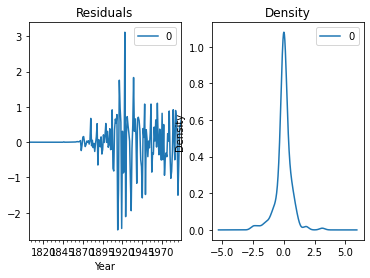

In [58]:
# Plot residual errors
residuals = pd.DataFrame(model_arima.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [59]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

In [60]:
stationary_arima_acc = forecast_accuracy(pred_arima.values, test.values)
stationary_arima_acc

{'mape': inf,
 'me': -0.014513993332541138,
 'mae': 0.48264158866199836,
 'mpe': nan,
 'rmse': 0.613080009448096}

#### Auto Regressor (AR) model

In [62]:
model_ar = AutoReg(train,lags = 6).fit()
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CO2   No. Observations:                  193
Model:                     AutoReg(6)   Log Likelihood                -160.352
Method:               Conditional MLE   S.D. of innovations              0.570
Date:                Fri, 18 Feb 2022   AIC                             -1.037
Time:                        13:04:20   BIC                             -0.899
Sample:                    01-01-1808   HQIC                            -0.981
                         - 01-01-1994                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0034      0.042     -0.081      0.935      -0.085       0.078
CO2.L1        -0.9695      0.071    -13.652      0.000      -1.109      -0.830
CO2.L2        -1.0067      0.095    -10.572      0.0

In [63]:
pred_ar = model_ar.predict(start=start,end=end,dynamic = False)
print(pred_ar)


1995-01-01   -0.355927
1996-01-01   -0.208764
1997-01-01    0.053936
1998-01-01    0.239338
1999-01-01    0.124217
2000-01-01   -0.146736
2001-01-01   -0.040342
2002-01-01   -0.065187
2003-01-01    0.009840
2004-01-01    0.077525
2005-01-01    0.029742
2006-01-01   -0.016715
2007-01-01   -0.048704
2008-01-01   -0.008430
2009-01-01    0.008656
2010-01-01    0.016361
2011-01-01    0.014504
2012-01-01   -0.008896
2013-01-01   -0.013300
2014-01-01   -0.007153
Freq: AS-JAN, dtype: float64


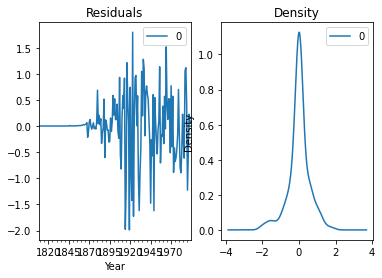

In [64]:
# Plot residual errors
residuals = pd.DataFrame(model_ar.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [65]:
stationary_ar_acc = forecast_accuracy(pred_ar.values, test.values)
stationary_ar_acc

{'mape': inf,
 'me': -0.027301735949541207,
 'mae': 0.4959715255851231,
 'mpe': nan,
 'rmse': 0.6233294379710825}

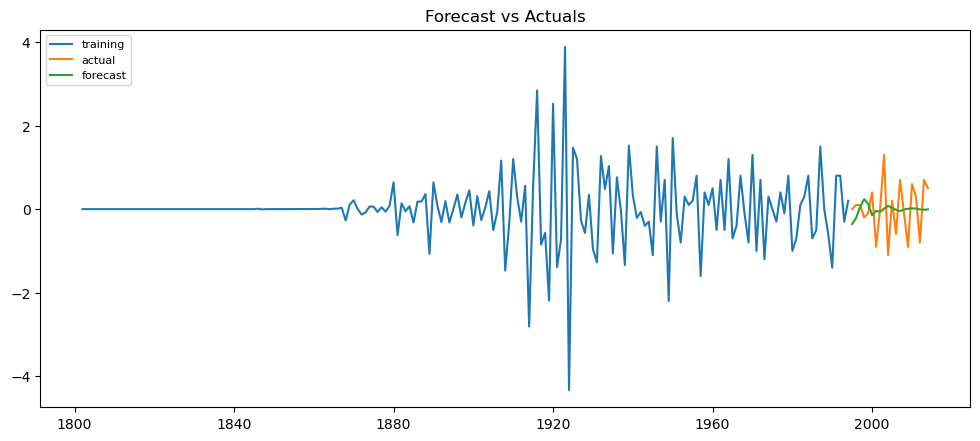

In [66]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_ar, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [67]:
#Auto ARIMA model

In [68]:
!pip install pmdarima

In [69]:
import pmdarima as pm

In [70]:
model = pm.auto_arima(train['CO2'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=466.471, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=421.365, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=384.807, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=375.489, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=333.120, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 1.659 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Obser

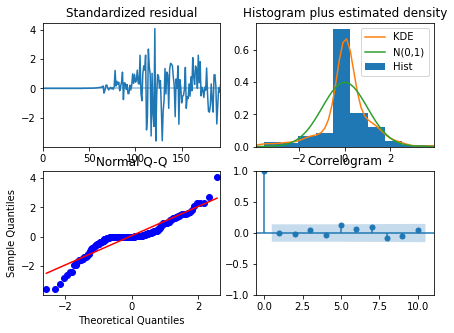

In [71]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [72]:
pred = model.predict(start=start,end=end)
print(pred)

[-1.03647076e-01 -1.78015490e-02  1.26157435e-02  1.42374778e-03
 -1.50034158e-03 -9.05761449e-05  1.74696736e-04  2.00534417e-06
 -1.99364196e-05  7.17376199e-07]


In [73]:
stationary_aa_acc = forecast_accuracy(pred, test.values)
stationary_aa_acc

{'mape': inf,
 'me': -0.02088425681055968,
 'mae': 0.4825341310913892,
 'mpe': nan,
 'rmse': 0.6126499764961139}

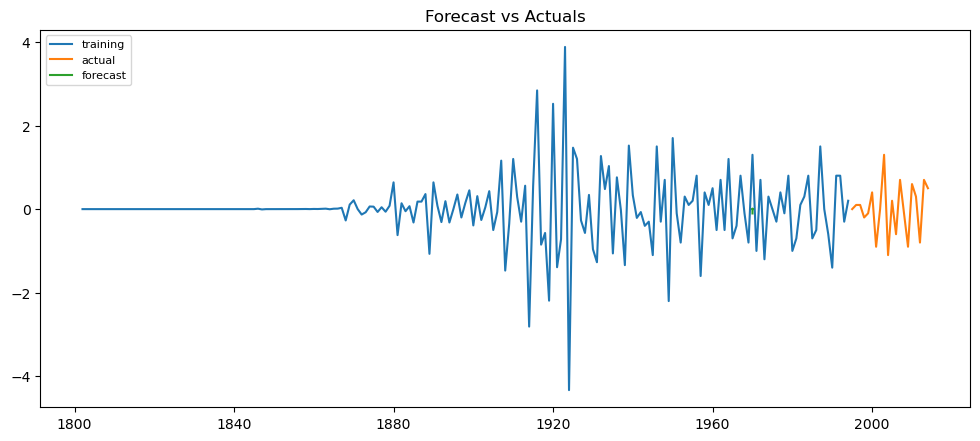

In [74]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [75]:
data = {"MODEL":pd.Series(["ARIMA","Auto Regressor","Auto ARIMA"]),"RMSE_Values":pd.Series([stationary_arima_acc["rmse"],stationary_ar_acc["rmse"],
stationary_aa_acc["rmse"]]),"MAPE_values":pd.Series([stationary_arima_acc["mape"],stationary_ar_acc["mape"],stationary_aa_acc["mape"]]),
"ME_values":pd.Series([stationary_arima_acc["me"],stationary_ar_acc["me"],stationary_aa_acc["me"]]),
"MAE_values":pd.Series([stationary_arima_acc["mae"],stationary_ar_acc["mae"],stationary_aa_acc["mae"]]),
        "MPE_values":pd.Series([stationary_arima_acc["mpe"],stationary_ar_acc["mpe"],stationary_aa_acc["mpe"]])}

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values,MAPE_values,ME_values,MAE_values,MPE_values
2,Auto ARIMA,0.612650,inf,-0.020884,0.482534,NaN
0,ARIMA,0.613080,inf,-0.014514,0.482642,NaN
1,Auto Regressor,0.623329,inf,-0.027302,0.495972,NaN


In [76]:
#MODEL BUILDING ON NON-STATIONARY DATA / ORIGINAL DATA

In [77]:
df.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


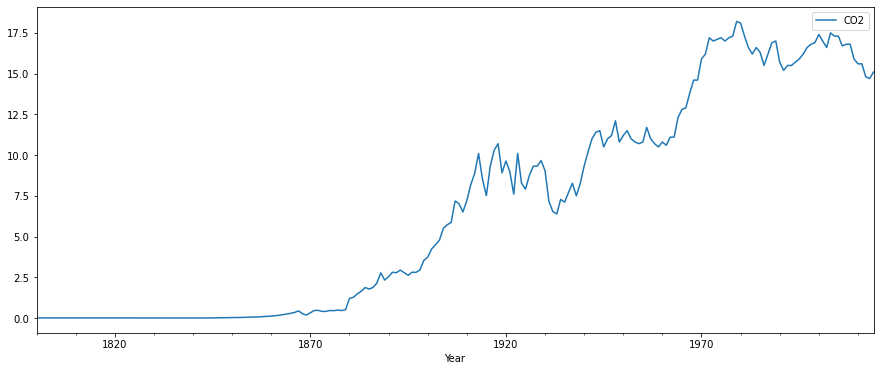

In [78]:
df.plot(figsize=(15, 6))
plt.show()

In [79]:
train = df[:195]
test = df[195:]
print(train.shape,test.shape)

(195, 1) (20, 1)


In [80]:
train.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [81]:
test.head()

,CO2
Year,
1995-01-01,15.9
1996-01-01,16.2
1997-01-01,16.6
1998-01-01,16.8
1999-01-01,16.9


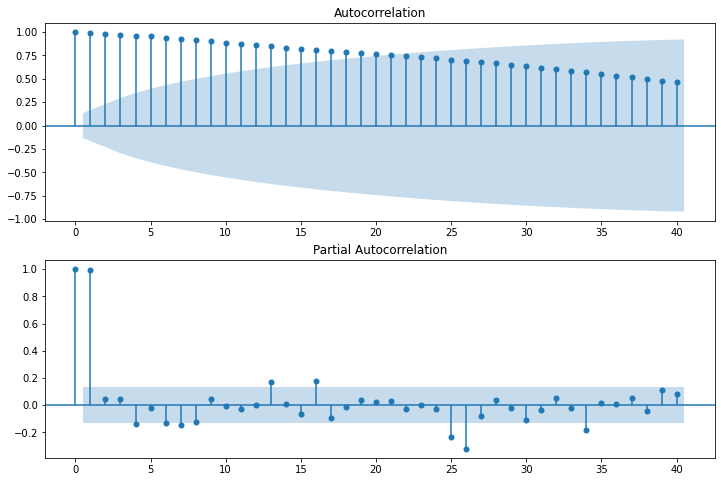

In [82]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)

In [83]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [84]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [85]:
# evaluate parameters
p_values = [0,1,2,3,4,5]
#p_values = [0,1,2,3]
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, test.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=10.175
ARIMA(0, 0, 1) RMSE=5.218
ARIMA(0, 0, 2) RMSE=3.120
ARIMA(0, 0, 3) RMSE=1.965
ARIMA(0, 0, 4) RMSE=1.885
ARIMA(0, 1, 0) RMSE=0.438
ARIMA(0, 1, 1) RMSE=0.439
ARIMA(0, 1, 2) RMSE=0.439
ARIMA(0, 1, 3) RMSE=0.424
ARIMA(0, 1, 4) RMSE=0.424
ARIMA(0, 2, 0) RMSE=0.612
ARIMA(0, 2, 1) RMSE=0.451
ARIMA(0, 2, 2) RMSE=0.454
ARIMA(0, 2, 3) RMSE=0.458
ARIMA(0, 2, 4) RMSE=0.443
ARIMA(0, 3, 0) RMSE=1.037
ARIMA(0, 3, 1) RMSE=0.613
ARIMA(0, 3, 2) RMSE=0.450
ARIMA(0, 3, 3) RMSE=0.454
ARIMA(0, 3, 4) RMSE=0.456
ARIMA(0, 4, 0) RMSE=1.853
ARIMA(0, 4, 1) RMSE=1.039
ARIMA(0, 4, 2) RMSE=0.679
ARIMA(0, 4, 3) RMSE=0.449
ARIMA(0, 4, 4) RMSE=0.441
ARIMA(1, 0, 0) RMSE=0.437
ARIMA(1, 0, 1) RMSE=0.438
ARIMA(1, 0, 2) RMSE=0.438
ARIMA(1, 0, 3) RMSE=0.423
ARIMA(1, 0, 4) RMSE=0.423
ARIMA(1, 1, 0) RMSE=0.439
ARIMA(1, 1, 1) RMSE=0.433
ARIMA(1, 1, 2) RMSE=0.431
ARIMA(1, 1, 3) RMSE=0.437
ARIMA(1, 1, 4) RMSE=0.440
ARIMA(1, 2, 0) RMSE=0.544
ARIMA(1, 2, 1) RMSE=0.453
ARIMA(1, 2, 2) RMSE=0.446
ARIMA(1, 2,

#### ARIMA

In [86]:
model_arima = ARIMA(train['CO2'],order = (3,1,4))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  195
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -156.996
Date:                Fri, 18 Feb 2022   AIC                            329.991
Time:                        13:23:38   BIC                            356.134
Sample:                    01-01-1800   HQIC                           340.577
                         - 01-01-1994                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2912      0.273      4.729      0.000       0.756       1.826
ar.L2          0.0412      0.447      0.092      0.927      -0.835       0.917
ar.L3         -0.4416      0.216     -2.043      0.041      -0.865      -0.018
ma.L1         -1.3505      0.279     -4.841      0.000      -1.897      -0.804
ma.L2         -0.0984      0.443     -0.222      0.824      -0.966       0.769
ma.L3          0.7347      0.194      3.778      0.000       0.354       1.116
ma.L4         -0.1533      0.075     -2.049      0.040      -0.300      -0.007
sigma2         0.2948      0.022     13.243      0.000       0.251       0.338
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                79.13
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):            4042.67   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
start = len(train)
end = len(train)+len(test)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)

1995-01-01    15.730725
1996-01-01    15.738904
1997-01-01    15.778470
1998-01-01    15.792957
1999-01-01    15.809681
2000-01-01    15.814402
2001-01-01    15.814788
2002-01-01    15.808097
2003-01-01    15.797389
2004-01-01    15.783117
2005-01-01    15.767202
2006-01-01    15.750794
2007-01-01    15.735254
2008-01-01    15.721540
2009-01-01    15.710438
2010-01-01    15.702400
2011-01-01    15.697621
2012-01-01    15.696020
2013-01-01    15.697306
2014-01-01    15.701011
Freq: AS-JAN, Name: predicted_mean, dtype: float64


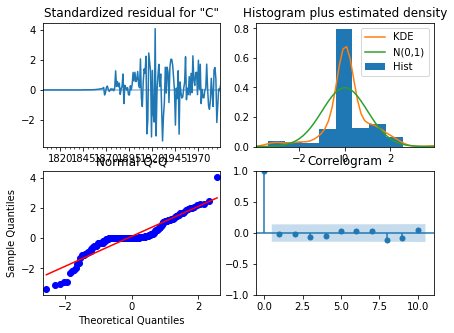

In [88]:
model_arima.plot_diagnostics(figsize=(7,5))
plt.show()

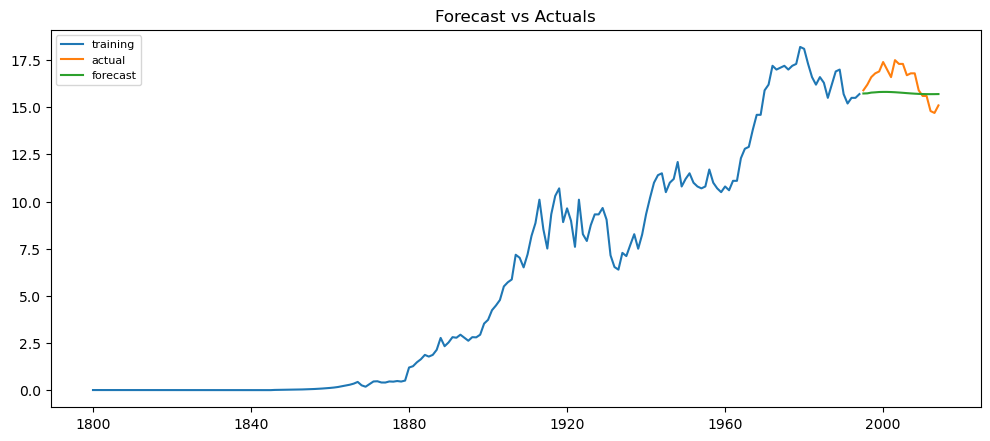

In [89]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_arima, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [90]:
ns_arima_acc = forecast_accuracy(pred_arima,test.CO2)
ns_arima_acc

{'mape': 0.05362618937362593,
 'me': -0.6225941803381608,
 'mae': 0.8920299232994797,
 'mpe': -0.03552521821099243,
 'rmse': 1.0155475463025099}

#### Single Exponential Smoothing

In [111]:
ses_model = SimpleExpSmoothing(train.CO2).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = len(train),end = len(train)+len(test)-1)

In [112]:
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'Simple Exponential Smoothing Model RMSE':rmse})


In [113]:
SES_acc = forecast_accuracy(pred_ses.values, test.values)
SES_acc

{'Simple Exponential Smoothing Model RMSE': 0.9682045310926879}

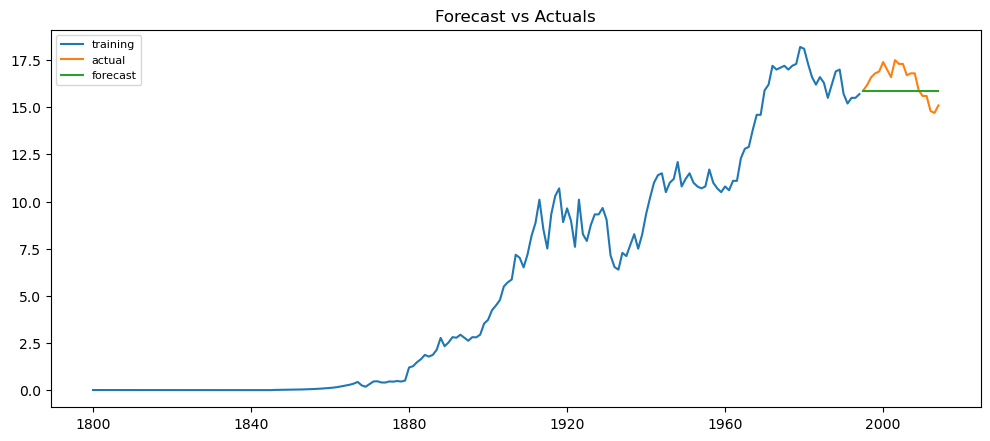

In [114]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_ses, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Double Exponential Smoothing or Holt's method

In [115]:
hw_model = Holt(train.CO2).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])

In [116]:
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'Double Exponential Smoothing Model RMSE':rmse})


In [117]:
DES_acc = forecast_accuracy(pred_hw.values, test.values)
DES_acc

{'Double Exponential Smoothing Model RMSE': 1.6957306698146153}

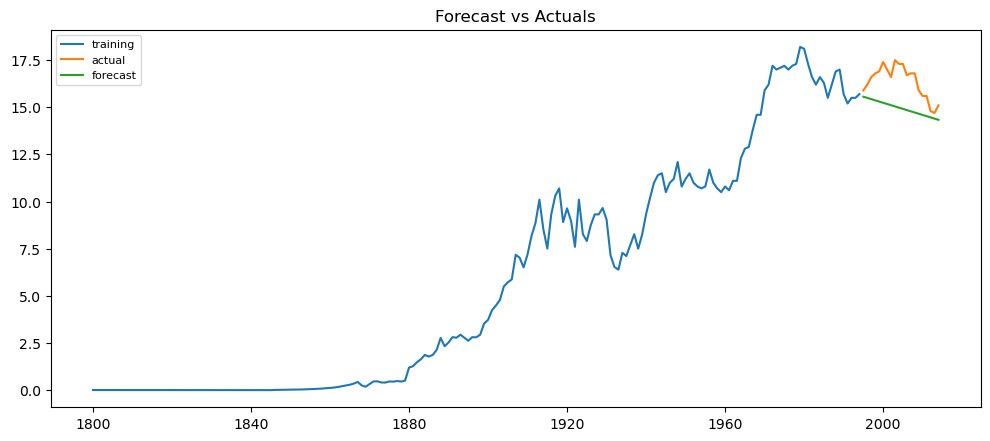

In [118]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_hw, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Winter's Method

In [119]:
hwe_model_add = ExponentialSmoothing(train["CO2"],seasonal="add",trend="add",seasonal_periods=2).fit() 
pred_hwe_add_add = hwe_model_add.predict(start = start,end = end)

In [120]:
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'Holts Winter Smoothing Model RMSE':rmse})


In [121]:
Holt_acc = forecast_accuracy(pred_hwe_add_add.values, test.values)
Holt_acc

{'Holts Winter Smoothing Model RMSE': 0.9719109985415236}

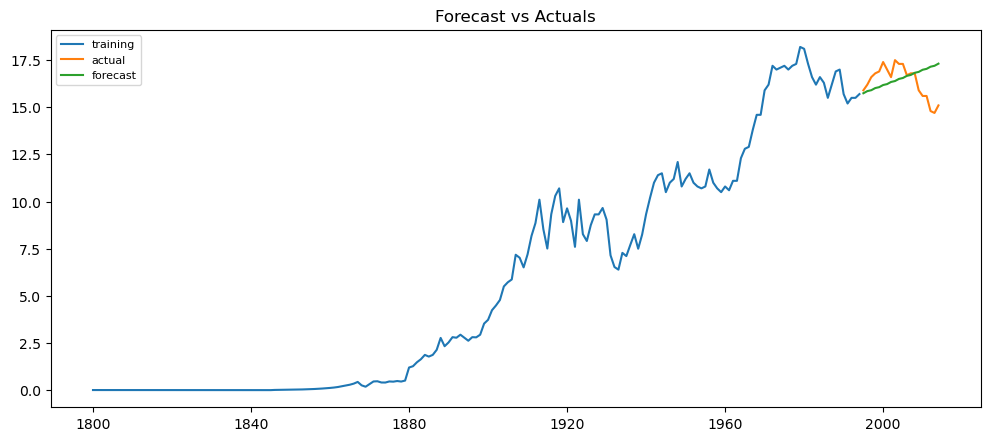

In [122]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_hwe_add_add, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Holts winter ES with multiplicative seasonality and additive trend

In [123]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(train["CO2"],seasonal="mul",trend="add",seasonal_periods=2).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = start,end = end)

In [124]:
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'Holts Winter SE with multiplicative seasonality and additive trend RMSE':rmse})


In [125]:
Holt_acc1 = forecast_accuracy(pred_hwe_mul_add.values, test.values)
Holt_acc1

{'Holts Winter SE with multiplicative seasonality and additive trend RMSE': 0.9806807348367401}

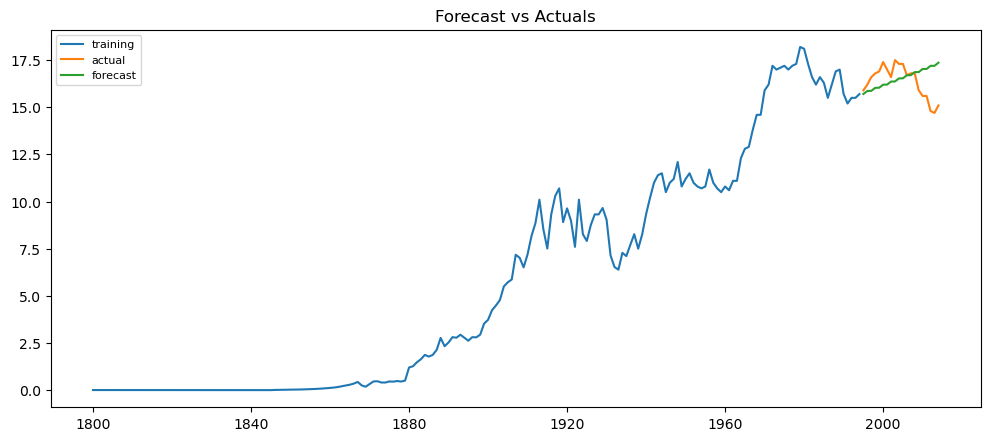

In [126]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_hwe_mul_add, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Holts winter ES with multiplicative seasonality and multiplicative trend

In [127]:
# Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend
hwe_model_mul_mul = ExponentialSmoothing(train["CO2"],seasonal="mul",trend="mul",seasonal_periods=2).fit()
pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = start,end = end)

In [128]:
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'Holts Winter ES with multiplicative seasonality and  multiplicative trend RMSE':rmse})


In [129]:
Holt_acc2 = forecast_accuracy(pred_hwe_mul_mul.values, test.values)
Holt_acc2

{'Holts Winter ES with multiplicative seasonality and  multiplicative trend RMSE': 1.1718967038282404}

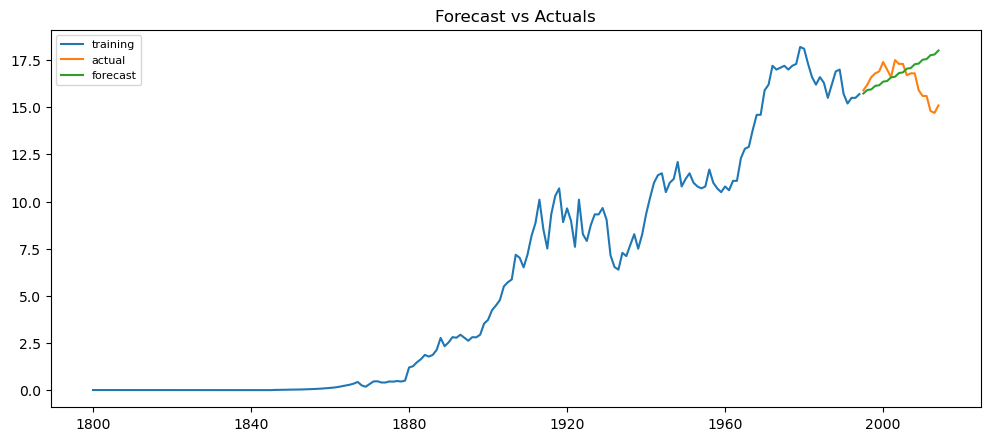

In [130]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_hwe_mul_mul, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [132]:
ns_arima_acc['rmse']

1.0155475463025099

In [133]:
SES_acc

{'Simple Exponential Smoothing Model RMSE': 0.9682045310926879}

In [136]:
df1 = pd.read_csv('C:/Users/DELL/Desktop/co2.csv', header=0, index_col=0, parse_dates=True)
df1

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542
...,...
2010-01-01,15.60000
2011-01-01,15.60000
2012-01-01,14.80000


In [137]:
df1["t"] = np.arange(0,215)
df1["t_squared"] = df1["t"] * df1["t"]
df1["Log_Temp"] = np.log(df1["CO2"])
df1

,CO2,t,t_squared,Log_Temp
Year,,,,
1800-01-01,0.00568,0,0,-5.170804
1801-01-01,0.00561,1,1,-5.183205
1802-01-01,0.00555,2,4,-5.193957
1803-01-01,0.00548,3,9,-5.206650
1804-01-01,0.00542,4,16,-5.217659
...,...,...,...,...
2010-01-01,15.60000,210,44100,2.747271
2011-01-01,15.60000,211,44521,2.747271
2012-01-01,14.80000,212,44944,2.694627


In [138]:
train = df1[:195]
test = df1[195:]
print(train.shape,test.shape)

(195, 4) (20, 4)


#### Linear Model

In [140]:
import statsmodels.formula.api as smf
import numpy as np

linear_model = smf.ols('CO2~t',data=train).fit() #Training
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t']))) #Testing
rmse_linear = np.sqrt(np.mean((np.array(test['CO2'])-np.array(pred_linear))**2)) #Evaluation metric - RMSE
rmse_linear

1.2772233269805124

#### Exponential Model

In [141]:
Exp = smf.ols('Log_Temp~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['CO2'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

236.4719355746894

#### Quadratic Model

In [142]:
#Quadratic
Quad = smf.ols('CO2~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['CO2'])-np.array(pred_Quad))**2))
rmse_Quad

5.096472215502596

In [143]:
print(ns_arima_acc['rmse'])
print(SES_acc)
print(DES_acc)
print(Holt_acc)
print(Holt_acc1)
print(Holt_acc2)
print("RMSE of Linear Model is",rmse_linear)
print("RMSE of Exponential Model is",rmse_Exp)
print("RMSE of Quadratic Model is",rmse_Quad)

1.0155475463025099
{'Simple Exponential Smoothing Model RMSE': 0.9682045310926879}
{'Double Exponential Smoothing Model RMSE': 1.6957306698146153}
{'Holts Winter Smoothing Model RMSE': 0.9719109985415236}
{'Holts Winter SE with multiplicative seasonality and additive trend RMSE': 0.9806807348367401}
{'Holts Winter ES with multiplicative seasonality and  multiplicative trend RMSE': 1.1718967038282404}
RMSE of Linear Model is 1.2772233269805124
RMSE of Exponential Model is 236.4719355746894
RMSE of Quadratic Model is 5.096472215502596


#### final model

In [145]:
final_arima = ARIMA(df1['CO2'],order = (3,1,4))
final_arima = final_arima.fit()
final_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  215
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -166.994
Date:                Fri, 18 Feb 2022   AIC                            349.987
Time:                        22:43:40   BIC                            376.915
Sample:                    01-01-1800   HQIC                           360.869
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4848      0.186      7.997      0.000       1.121       1.849
ar.L2         -0.1204      0.355     -0.339      0.735      -0.817       0.576
ar.L3         -0.4387      0.184     -2.378      0.017      -0.800      -0.077
ma.L1         -1.5664      0.193     -8.134      0.000      -1.944      -1.189
ma.L2          0.0789      0.353      0.224      0.823      -0.613       0.771
ma.L3          0.7951      0.182      4.373      0.000       0.439       1.151
ma.L4         -0.2360      0.052     -4.572      0.000      -0.337      -0.135
sigma2         0.2756      0.021     13.289      0.000       0.235       0.316
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                77.20
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):             232.71   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [146]:
final_arima.fittedvalues.tail()

Year
2010-01-01    15.753639
2011-01-01    15.441467
2012-01-01    15.307321
2013-01-01    14.562676
2014-01-01    14.555051
dtype: float64

In [150]:
data1 = pd.read_csv('C:/Users/DELL/Desktop/co2.csv', header=0, index_col=0, parse_dates=True)

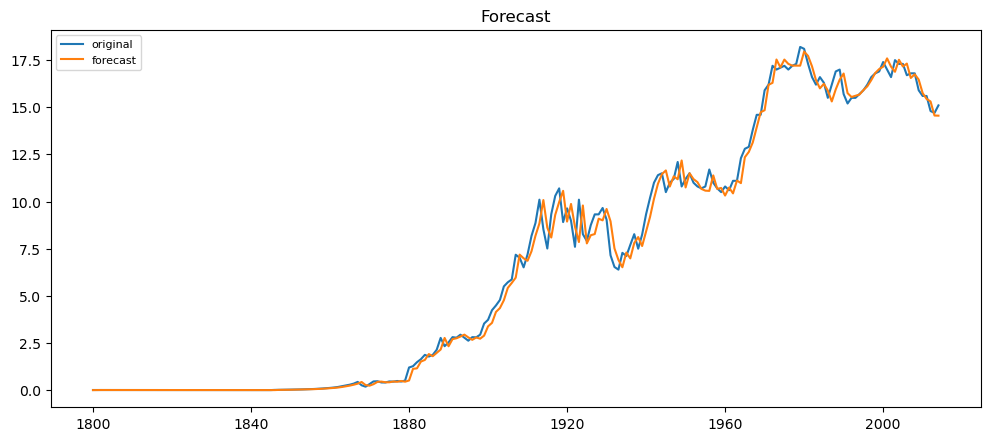

In [151]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data1, label='original')
#plt.plot(test, label='actual')
plt.plot(final_arima.fittedvalues, label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Forecasting for 5 Years

In [152]:
from pandas.tseries.offsets import DateOffset

In [153]:
future_dates=[data1.index[-1]+ DateOffset(years=x)for x in range(0,6)]

In [154]:
future_df=pd.DataFrame(index=future_dates[1:],columns=data1.columns)

In [155]:
future_df['CO2'] = final_arima.predict(start = 215, end = 220, dynamic= True)  

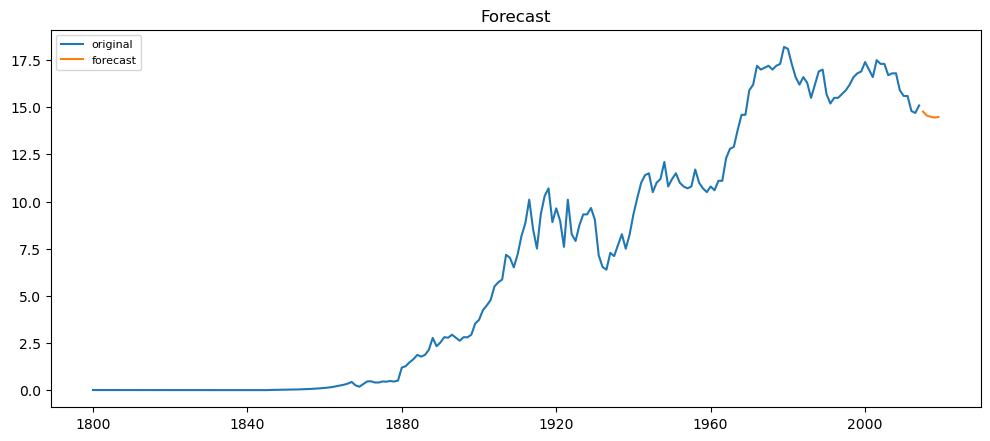

In [156]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data1, label='original')
#plt.plot(test, label='actual')
plt.plot(future_df['CO2'], label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [157]:
future_df.tail()

,CO2
2015-01-01,14.773453
2016-01-01,14.556167
2017-01-01,14.498216
2018-01-01,14.452998
2019-01-01,14.488166


In [158]:
# Exporting to csv file# Exporting to csv file
future_df.to_csv(r'forecast_data_5years1.csv',index=True)

#### Forecast for 10 years

In [159]:
future_dates_10=[data1.index[-1]+ DateOffset(years=x)for x in range(0,11)]
future_df_10=pd.DataFrame(index=future_dates_10[1:],columns=data1.columns)
future_df_10.tail()
len(future_df_10)

10

In [160]:
future_df_10['CO2'] = final_arima.predict(start = 215, end = 225, dynamic= True) 

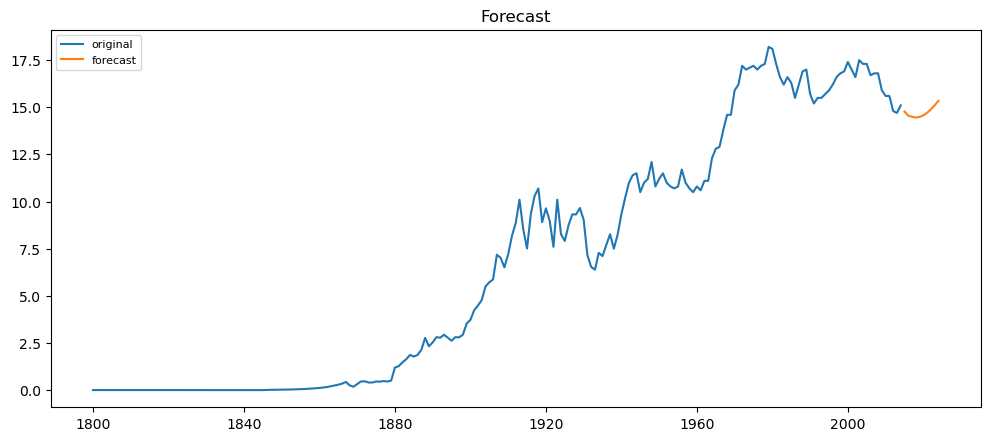

In [161]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data1, label='original')
#plt.plot(test, label='actual')
plt.plot(future_df_10['CO2'], label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [162]:
future_df_10

,CO2
2015-01-01,14.773453
2016-01-01,14.556167
2017-01-01,14.498216
2018-01-01,14.452998
2019-01-01,14.488166
2020-01-01,14.571250
2021-01-01,14.710215
2022-01-01,14.891115
2023-01-01,15.106530
2024-01-01,15.343627


In [163]:
# Exporting to csv file
future_df_10.to_csv(r'forecast_data_10years.csv',index=True)

In [164]:
# Saving the pickle file
import pickle
pickle.dump(final_arima, open('Forecast_arima.pkl','wb'))